In [60]:
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
import csv as csv
import pydotplus

import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoCV, BayesianRidge
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
!pip install dmba
!pip install pydotplus
from dmba import classificationSummary, gainsChart, liftChart
from sklearn.ensemble import RandomForestClassifier

In [36]:
df = pd.read_csv('AB_NYC_2019.csv')

df = pd.DataFrame(df)

df.head()



,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [37]:
df_without_id = df.drop(columns=['id', 'host_id'])

In [38]:
df.sum()

id                                                                     929843218533
host_id                                                               3306280420566
neighbourhood_group               BrooklynManhattanManhattanBrooklynManhattanMan...
neighbourhood                     KensingtonMidtownHarlemClinton HillEast Harlem...
latitude                                                              1991441.95552
longitude                                                            -3615891.33331
room_type                         Private roomEntire home/aptPrivate roomEntire ...
price                                                                       7467278
minimum_nights                                                               343730
number_of_reviews                                                           1138005
reviews_per_month                                                          53340.04
calculated_host_listings_count                                              

In [43]:


df_without_id.isnull().sum()

df_without_id_na = df_without_id.fillna(0)

results = df_without_id_na.corr()


print(results)

                                latitude  longitude     price  minimum_nights  \
latitude                        1.000000   0.084788  0.033939        0.024869   
longitude                       0.084788   1.000000 -0.150019       -0.062747   
price                           0.033939  -0.150019  1.000000        0.042799   
minimum_nights                  0.024869  -0.062747  0.042799        1.000000   
number_of_reviews              -0.015389   0.059094 -0.047954       -0.080116   
reviews_per_month              -0.018758   0.138516 -0.050564       -0.124905   
calculated_host_listings_count  0.019517  -0.114713  0.057472        0.127960   
availability_365               -0.010983   0.082731  0.081829        0.144303   

                                number_of_reviews  reviews_per_month  \
latitude                                -0.015389          -0.018758   
longitude                                0.059094           0.138516   
price                                   -0.047954     

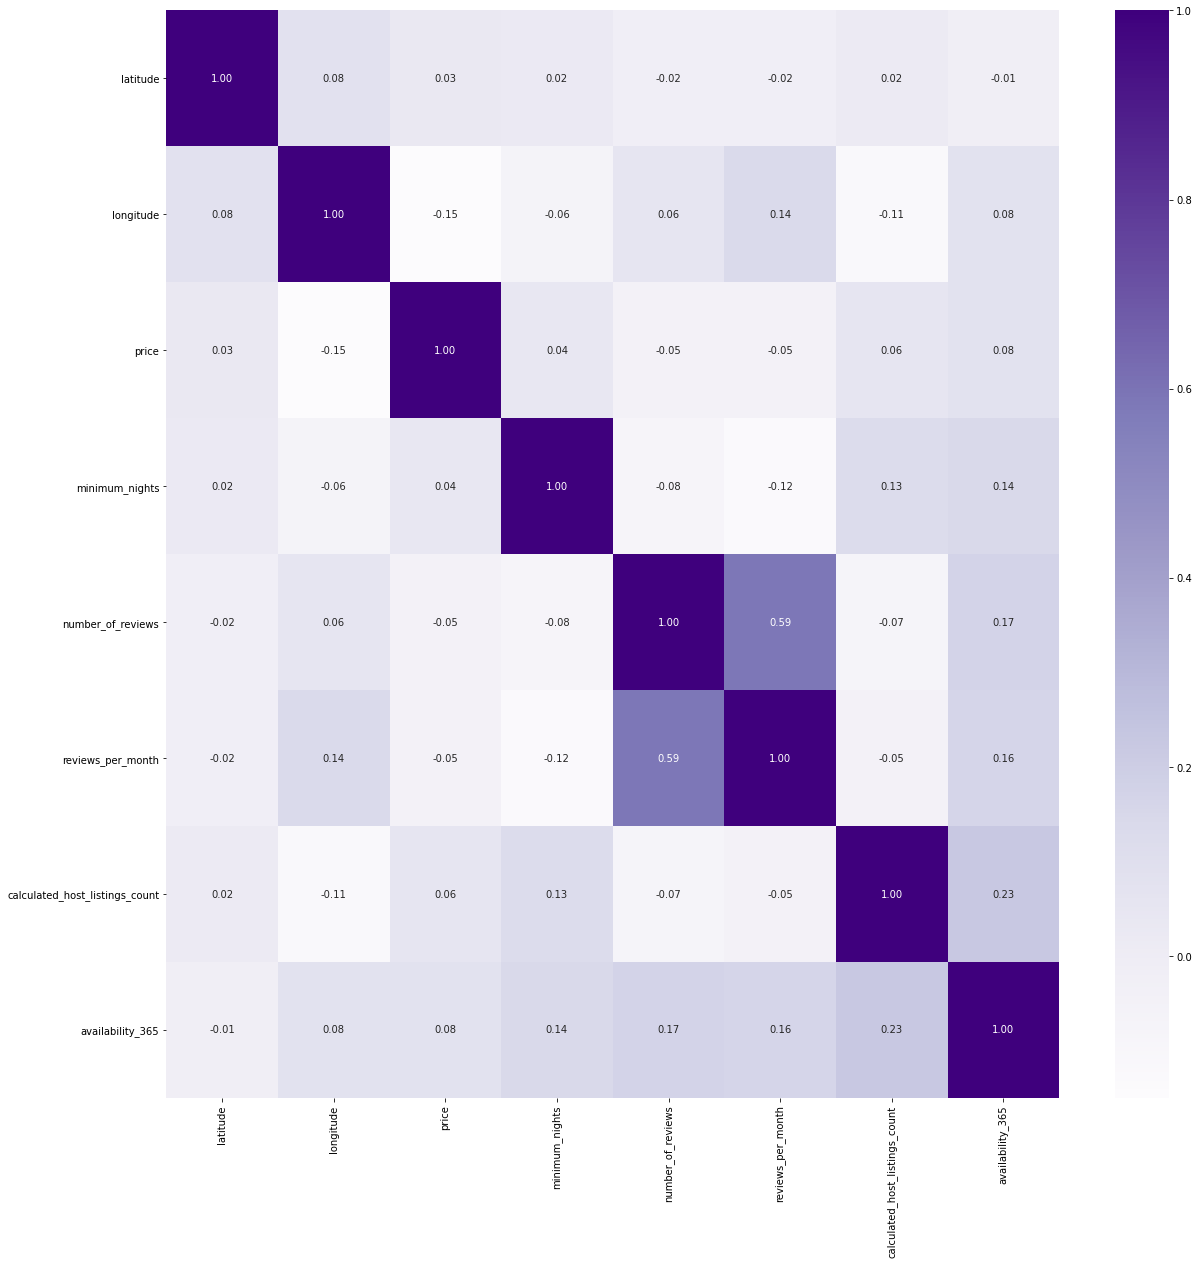

In [44]:
%matplotlib inline
fig, ax = plt.subplots()
fig.set_size_inches(20, 20)
sns.heatmap(results, annot=True, fmt=".2f", cmap="Purples", ax=ax)
plt.show()

In [45]:
predictors = ['latitude', 'longitude', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']

outcome = 'price'

In [46]:
X = df_without_id_na[predictors]
y = df_without_id_na[outcome]

In [63]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoCV, BayesianRidge
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
!pip install dmba
from dmba import classificationSummary, gainsChart, liftChart
from sklearn.ensemble import RandomForestClassifier
!pip install lime
from lime import lime_tabular

     |████████████████████████████████| 275 kB 2.3 MB/s eta 0:00:01
     |████████████████████████████████| 12.7 MB 905 kB/s eta 0:00:01
     |████████████████████████████████| 165 kB 1.3 MB/s eta 0:00:01
     |████████████████████████████████| 4.3 MB 672 kB/s eta 0:00:01
     |████████████████████████████████| 3.3 MB 1.1 MB/s eta 0:00:01
  Using cached decorator-4.4.2-py2.py3-none-any.whl (9.2 kB)
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283845 sha256=34b41b0e8d350ad8b3a615dbc345aaccefe30d022c54f1a98288c807a1c3958c
  Stored in directory: /Users/macdaniel/Library/Caches/pip/wheels/e6/a6/20/cc1e293fcdb67ede666fed293cb895395e7ecceb4467779546
Successfully built lime
  Attempting uninstall: decorator
    Found existing installation: decorator 5.0.7
    Uninstalling decorator-5.0.7:
      Successfully uninstalled decorator-5.0.7


In [67]:
import numpy as np
from sklearn.model_selection import train_test_split
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.3, random_state=1)


In [75]:
from sklearn.tree import DecisionTreeClassifier
from dmba import plotDecisionTree
import pydotplus

DecisionTree = DecisionTreeClassifier(max_depth = 4)
DecisionTree.fit(train_X, train_y)

plotDecisionTree(DecisionTree, feature_names=train_X.columns)



'You need to install pydotplus to visualize decision trees'